# Quan Learning - 2025 Summer

In [1]:
# lib for numerical operations
import numpy as np
# lib for data manipulation and analysis
import pandas as pd
# lib for plotting graphs
import matplotlib.pyplot as plt
# lib for managing fonts in plots
import matplotlib.font_manager as fm
# lib for stat data visualization
import seaborn as sns
# lib for fetch financial data from Yahoo
import yfinance as yf
# lib for working with dates and times
from datetime import datetime, timedelta  

# setting the plot style
plt.style.use('seaborn-v0_8') 
plt.rcParams['figure.figsize'] = (14, 7)  
plt.rcParams['font.size'] = 12  

pd.set_option('display.max_columns', None)

## Using Yahoo Finance to get DATA

In [3]:
# lib to fetch data
import yfinance as yf

# set the stock ticker symbol here
ticker_symbol = "TSLA"

# download the stock data for the past 3 years
stock_data = yf.download(ticker_symbol, period="3y", group_by='column')

# print the data to inspect it
print("Original Data: ")
print(stock_data.head())

# adjust column names by getting the first level of the column index
stock_data.columns = stock_data.columns.get_level_values(0)
print("Data after flattening: ")
print(stock_data.head())

# save the adjusted stock data to a CSV file
stock_data.to_csv(f"{ticker_symbol}_past_3_year_stock_data.csv")
print(f"{ticker_symbol} past 3 year stock data downloaded and saved to CSV file.")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Original Data: 
Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2022-05-06  288.549988  296.000000  281.036682  295.666656   72903000
2022-05-09  262.369995  281.876678  260.383331  278.816681   90810300
2022-05-10  266.679993  275.119995  258.083344  273.103333   84401700
2022-05-11  244.666672  269.923340  242.399994  265.000000   97224600
2022-05-12  242.666672  253.220001  226.666672  233.666672  140313000
Data after flattening: 
Price            Close        High         Low        Open     Volume
Date                                                                 
2022-05-06  288.549988  296.000000  281.036682  295.666656   72903000
2022-05-09  262.369995  281.876678  260.383331  278.816681   90810300
2022-05-10  266.679993  275.119995  258.083344  273.103333   84401700
2022-05-11  244.666672  269.923340  242.399994  26

## Data exploration and visualization

In [5]:
print("Data Shape: ", stock_data.shape)
print("\nData Types: ")
print(stock_data.dtypes)
print("\nBasic Stat Info: ")
stock_data.describe()

Data Shape:  (751, 5)

Data Types: 
Price
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

Basic Stat Info: 


Price,Close,High,Low,Open,Volume
count,751.000000,751.000000,751.000000,751.000000,7.510000e+02
mean,236.472872,241.941460,230.880781,236.592464,1.095301e+08
std,63.516289,65.192888,61.868512,63.781380,4.004138e+07
min,108.099998,111.750000,101.809998,103.000000,3.716760e+07
25%,189.769997,194.159996,185.344994,189.080002,8.107095e+07
50%,232.229996,237.389999,225.380005,230.779999,1.021290e+08
75%,261.300003,266.860001,255.639999,260.385010,1.290814e+08
max,479.859985,488.540009,457.510010,475.899994,3.065906e+08


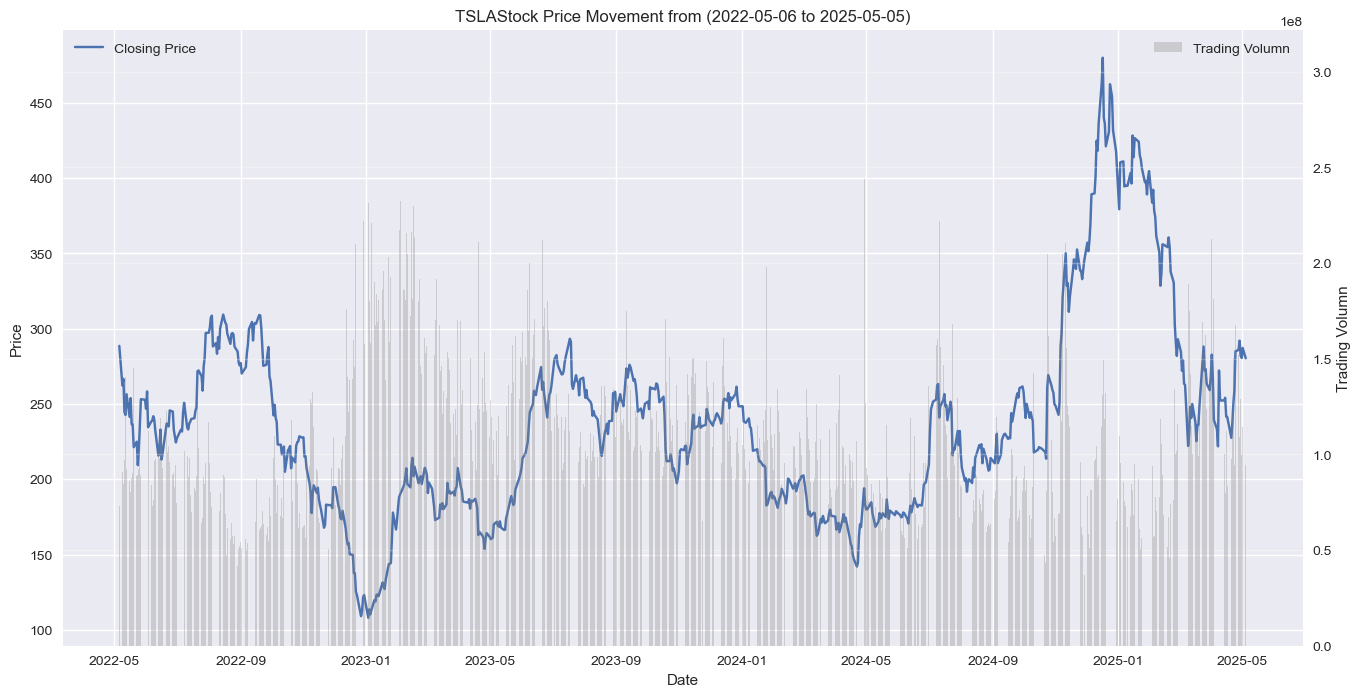

In [6]:
# set the font and disable Unicode minus sysmbol in plots
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False

# define start and end dates for the plot
start_date = stock_data.index[0]
end_date = stock_data.index[-1]

plt.figure(figsize=(16, 8))

# plot the Close price on the first axis
plt.plot(stock_data.index, stock_data['Close'], label='Closing Price')

# create a second axis to share the same x-axis with first one
ax1 = plt.gca()
ax2 = ax1.twinx()

# plot the Volumn on ax2
ax2.bar(stock_data.index, stock_data['Volume'], alpha=0.3, color='gray', label='Trading Volumn')
ax2.set_ylabel('Trading Volumn')

# set the title of the plot
plt.title(f'{ticker_symbol}Stock Price Movement from ({start_date.date()} to {end_date.date()})')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid(True, alpha=0.3)
plt.show()

## Calculation of tech indicators

In [12]:
# calculate the SMA for 20, 50, and 200 periods
stock_data['SMA20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['SMA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['SMA200'] = stock_data['Close'].rolling(window=200).mean()

# set period for RSI calculation
period=14
# calculate the difference in closing prices
delta = stock_data['Close'].diff()

# gain is the positive change
# lost is the negative change
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)

# calculate the average gain and average loss over the specified period using EMA
avg_gain = gain.ewm(alpha=1/period, min_periods=period, adjust=False).mean()
avg_loss = loss.ewm(alpha=1/period, min_periods=period, adjust=False).mean()

# calculate the RS and RSI
rs = avg_gain / avg_loss
# formula for RSI
rsi = 100 - (100 / (1 + rs))
# add the RSI values to the stock data
stock_data['RSI14'] = rsi

# calculate the rolling standard deviation and Bollinger Bands
# 20 period rolling std deviation
rolling_std = stock_data['Close'].rolling(window=20).std()
# middle bollinger band
stock_data['BB_middle'] = stock_data['Close'].rolling(window=20).mean()
# upper bollinger band
stock_data['BB_upper'] = stock_data['BB_middle'] + (rolling_std * 2)
# lower bollinger band
stock_data['BB_lower'] = stock_data['BB_middle'] - (rolling_std * 2)

stock_data.tail()

Price,Close,High,Low,Open,Volume,SMA20,SMA50,SMA200,RSI14,BB_middle,BB_upper,BB_lower
Date,,,,,,,,,,,,
2025-04-29,292.029999,293.320007,279.470001,285.500000,108906600,255.897501,267.917000,291.70900,60.001041,255.897501,296.651900,215.143103
2025-04-30,282.160004,284.450012,270.779999,279.899994,128961100,256.582502,266.478001,291.87865,56.204160,256.582502,298.664860,214.500144
2025-05-01,280.519989,290.869995,279.809998,280.010010,99659000,256.470501,264.877201,292.01805,55.574853,256.470501,298.270485,214.670517
2025-05-02,287.209991,294.779999,279.809998,284.899994,114454700,257.467001,263.533401,292.17130,57.657581,257.467001,301.254993,213.679008
2025-05-05,280.260010,284.850006,274.399994,284.570007,94618900,259.508501,262.382601,292.33010,54.784151,259.508501,303.562123,215.454880


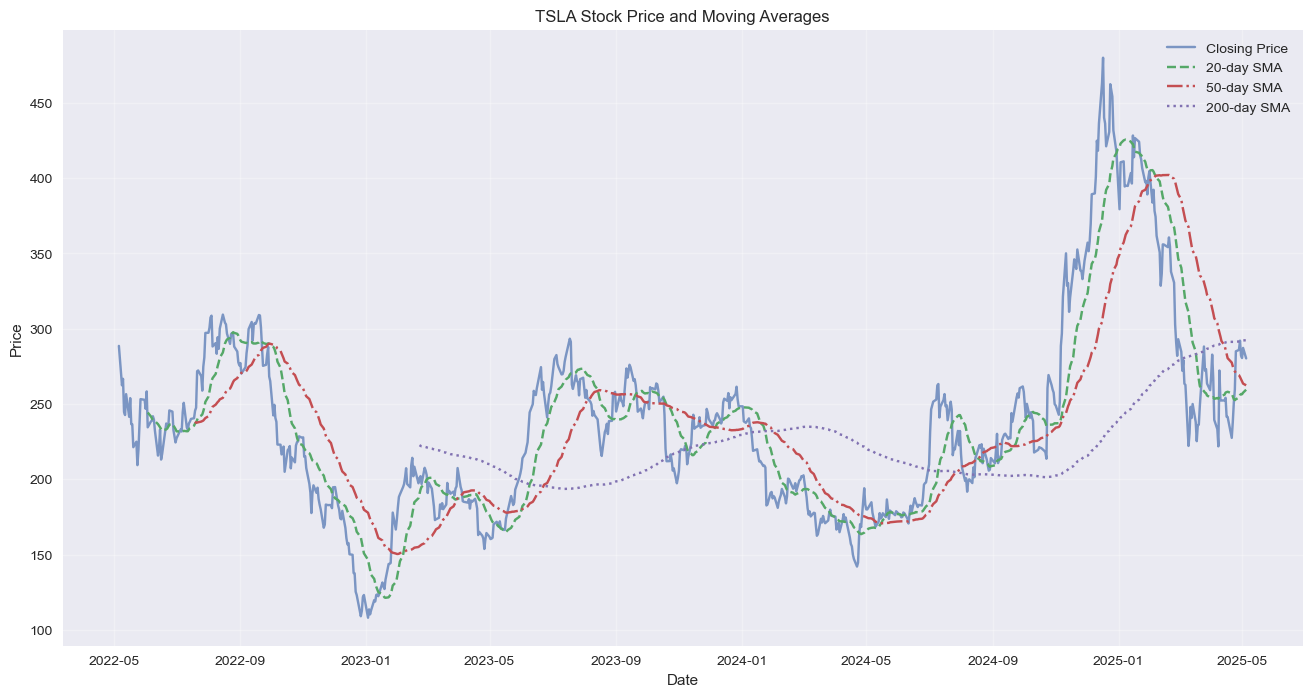

In [14]:
plt.figure(figsize=(16, 8))

# plot the closing price
plt.plot(stock_data.index, stock_data['Close'], label='Closing Price', alpha=0.7)

# plot SMA20, SMA50, and SMA200
plt.plot(stock_data.index, stock_data['SMA20'], label='20-day SMA', linestyle='--')
plt.plot(stock_data.index, stock_data['SMA50'], label='50-day SMA', linestyle='-.')
plt.plot(stock_data.index, stock_data['SMA200'], label='200-day SMA', linestyle=':')

# set the title, x-label, and y-label
plt.title(f'{ticker_symbol} Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

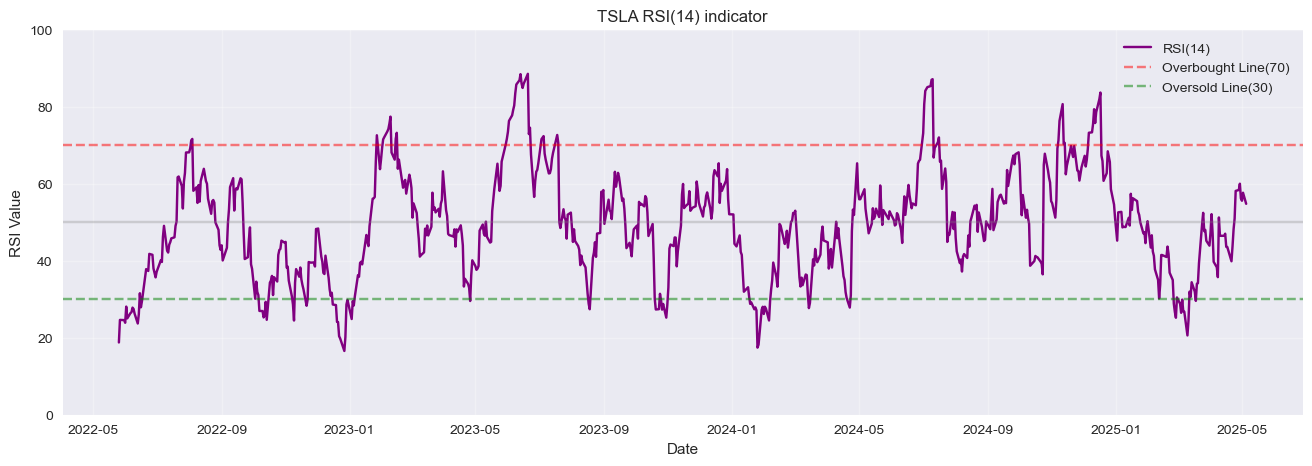

In [16]:
plt.figure(figsize=(16, 5))

# plot RSI(14) data with a purple line
plt.plot(stock_data.index, stock_data['RSI14'], label='RSI(14)', color='purple')

# add horizontal lines at RSI values 70, 30, and 50 to mark the overbought, oversold and neutral level
plt.axhline(y=70, color='r', linestyle='--', alpha=0.5, label='Overbought Line(70)')
plt.axhline(y=30, color='g', linestyle='--', alpha=0.5, label='Oversold Line(30)')
plt.axhline(y=50, color='gray', linestyle='-', alpha=0.3)

plt.title(f'{ticker_symbol} RSI(14) indicator')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 100)
plt.show()

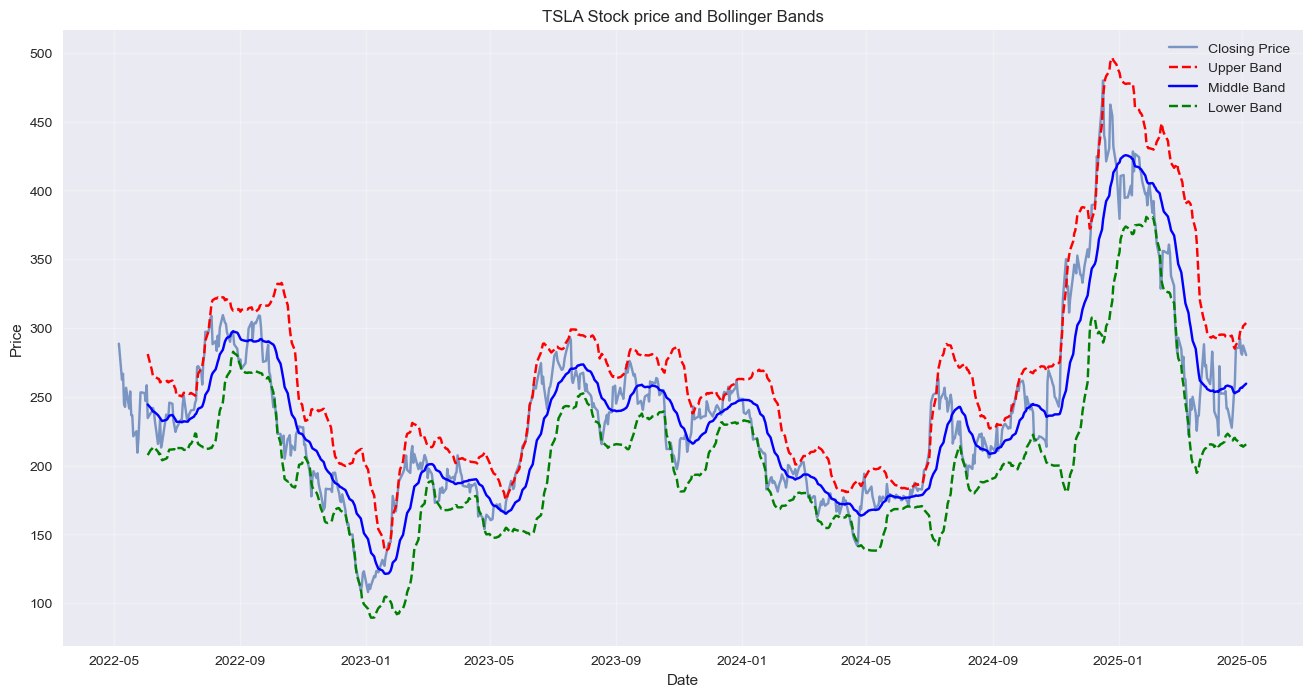

In [18]:
plt.figure(figsize=(16, 8))
plt.plot(stock_data.index, stock_data['Close'], label='Closing Price', alpha=0.7)
plt.plot(stock_data.index, stock_data['BB_upper'], label='Upper Band', color='red', linestyle='--')
plt.plot(stock_data.index, stock_data['BB_middle'], label='Middle Band', color='blue', linestyle='-')
plt.plot(stock_data.index, stock_data['BB_lower'], label='Lower Band', color='green', linestyle='--')

plt.title(f'{ticker_symbol} Stock price and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Simple Strategy Implementation

Implement a simple trading strategy based on moving average crossovers:

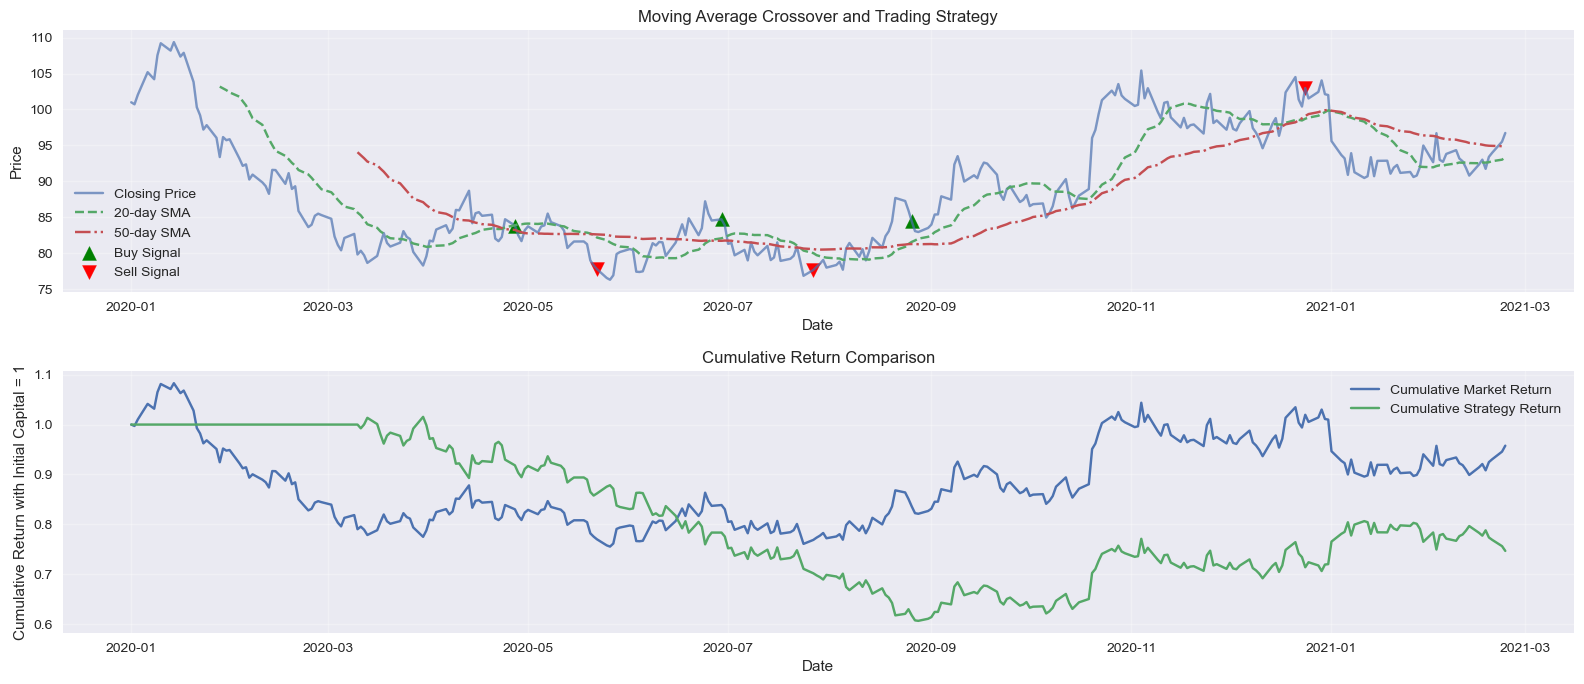

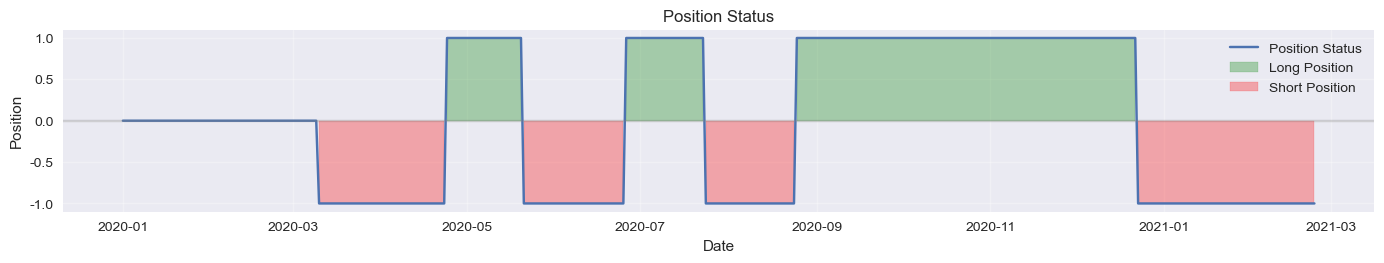

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set a random seed for reproducibility
np.random.seed(42)
# generate date range, starting from 2020.1.1
dates = pd.date_range(start='2020-01-01', periods=300, freq='B')
# generate random prices based on a log-normal distribution and calculate the cumulative product
prices = np.random.lognormal(mean=0, sigma=0.02, size=len(dates)).cumprod() * 100
# generate a Dataframe with the generated prices and dates
stock_data = pd.DataFrame({'Close': prices}, index=dates)

# calculate the 20-period and 50-period SMA
stock_data['SMA_Fast'] = stock_data['Close'].rolling(window=20).mean()
stock_data['SMA_Slow'] = stock_data['Close'].rolling(window=50).mean()

# initialize the singal column with 0
stock_data['Signal'] = 0
# assign a value of 1 if SMA_Fast is greater than SMA_Slow (buy signal), -1 if SMA_Fast is less (sell signal)
stock_data.loc[stock_data['SMA_Fast'] > stock_data['SMA_Slow'], 'Signal'] = 1
stock_data.loc[stock_data['SMA_Fast'] < stock_data['SMA_Slow'], 'Signal'] = -1

# Create a 'Trade_Signal' column that shifts the 'Signal' by 1 (previous day's signal)
stock_data['Trade_Signal'] = stock_data['Signal'].shift(1)

# calculate the market return
stock_data['Market_Return'] = stock_data['Close'].pct_change()

# get the position change which is the absolute difference btw consecutive trade signals
stock_data['Position_Change'] = stock_data['Trade_Signal'].diff().abs()

transaction_cost = 0.001

# calculate the strategy return, including transaction costs
stock_data['Strategy_Return'] = stock_data['Trade_Signal'] * stock_data['Market_Return'] - transaction_cost * stock_data['Position_Change']

# calculate the cumulative return for the market + strategy
stock_data['Cumulative_Market'] = (1 + stock_data['Market_Return'].fillna(0)).cumprod()
stock_data['Cumulative_Strategy'] = (1 + stock_data['Strategy_Return'].fillna(0)).cumprod()

plt.figure(figsize=(16, 10))

# create a subplot, 3 rows + 1 column + position 1
plt.subplot(3, 1, 1)
# plot the closing price, slow SMA, and fast SMA
plt.plot(stock_data.index, stock_data['Close'], label='Closing Price', alpha=0.7)
plt.plot(stock_data.index, stock_data['SMA_Fast'], label='20-day SMA', linestyle='--')
plt.plot(stock_data.index, stock_data['SMA_Slow'], label='50-day SMA', linestyle='-.')

# calculate trade changes based on trade signals
stock_data['Trade_Change'] = stock_data['Trade_Signal'].diff()
# identify buy and sell signals based on trade changes
buy_signals = stock_data[stock_data['Trade_Change'] == 2].index
sell_signals = stock_data[stock_data['Trade_Change'] == -2].index

# plot buy signals as green upward triangles
# and sell signals as red downward triangles
plt.scatter(buy_signals, stock_data.loc[buy_signals, 'Close'], marker='^', color='g', s=100, label='Buy Signal')
plt.scatter(sell_signals, stock_data.loc[sell_signals, 'Close'], marker='v', color='r', s=100, label='Sell Signal')

plt.title('Moving Average Crossover and Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)

# create other subplot
plt.subplot(3, 1, 2)
# plot cumulative returns for both market and strategy
plt.plot(stock_data.index, stock_data['Cumulative_Market'], label='Cumulative Market Return')
plt.plot(stock_data.index, stock_data['Cumulative_Strategy'], label='Cumulative Strategy Return')
# set the title and labels for this subplot
plt.title('Cumulative Return Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Return with Initial Capital = 1')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# create other subplot
plt.subplot(3, 1, 3)
# plot the signal column
plt.plot(stock_data.index, stock_data['Signal'], label='Position Status')
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

# fill the area above 0 with green where its buy signal
plt.fill_between(stock_data.index, stock_data['Signal'], 0, where=stock_data['Signal'] > 0, color='g', alpha=0.3, label='Long Position')
# fill the area below 0 with red where its sell signal
plt.fill_between(stock_data.index, stock_data['Signal'], 0, where=stock_data['Signal'] < 0, color='r', alpha=0.3, label='Short Position')

plt.title('Position Status')
plt.xlabel('Date')
plt.ylabel('Position')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Back Testing

Calculate the benefits of the strategy and evaluate the metrics:

In [24]:
import numpy as np

# remove missing values from the Dataframe
valid_data = stock_data.dropna()

# calculate the annualized return for the strategy and market
total_days = (valid_data.index[-1] - valid_data.index[0]).days
annual_return_strategy = (valid_data['Cumulative_Strategy'].iloc[-1] ** (365 / total_days)) - 1
annual_return_market = (valid_data['Cumulative_Market'].iloc[-1] ** (365 / total_days)) - 1

# calculate the daily volatility for the strategy and market
daily_vol_strategy = valid_data['Strategy_Return'].std()
annual_vol_strategy = daily_vol_strategy * np.sqrt(252)
daily_vol_market = valid_data['Market_Return'].std()
annual_vol_market = daily_vol_market * np.sqrt(252)

# calculate the sharpe ratio for the strategy and market
sharpe_ratio_strategy = annual_return_strategy / annual_vol_strategy
sharpe_ratio_market = annual_return_market / annual_vol_market

# calculate the maximum drawdown for the strategy and market
cumulative_returns_strategy = valid_data['Cumulative_Strategy']
running_max_strategy = cumulative_returns_strategy.cummax()
drawdown_strategy = (cumulative_returns_strategy - running_max_strategy) / running_max_strategy
max_drawdown_strategy = drawdown_strategy.min()
cumulative_returns_market = valid_data['Cumulative_Market']
running_max_market = cumulative_returns_market.cummax()
drawdown_market = (cumulative_returns_market - running_max_market) / running_max_market
max_drawdown_market = drawdown_market.min()

# print the results of the analysis
print(f"Evaluation Period: from {valid_data.index[0].date()} to {valid_data.index[-1].date()}")
print(f"Total number of transactions day: {len(valid_data)}")
print("\n--- Strategy Performance ---")
print(f"Annualized Return: {annual_return_strategy:.2%}")
print(f"Annualized Volatility: {annual_vol_strategy:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_strategy:.2f}")
print(f"Maximum Drawdown: {max_drawdown_strategy:.2%}")
print("\n--- Market Performance (Buy & Hold) ---")
print(f"Annualized Return: {annual_return_market:.2%}")
print(f"Annualized Volatility: {annual_vol_market:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio_market:.2f}")
print(f"Maximum Drawdown: {max_drawdown_market:.2%}")

Evaluation Period: from 2020-03-10 to 2021-02-23
Total number of transactions day: 251

--- Strategy Performance ---
Annualized Return: -26.25%
Annualized Volatility: 31.50%
Sharpe Ratio: -0.83
Maximum Drawdown: -40.26%

--- Market Performance (Buy & Hold) ---
Annualized Return: -4.41%
Annualized Volatility: 31.66%
Sharpe Ratio: -0.14
Maximum Drawdown: -14.19%



## Summary and next step 

In this notebook, we learn:
- how to obtain and process stock data
- how to calculate and visualize technical indicators
- how to implement a simple moving average crossover strategy
- how to evaluate the performance of a strategy

The next step you can try:

- Optimizing strategy parameters
- Implement other trading strategies (e.g. RSI, Bollinger Bands, etc.)
- Add more risk management measures
- Construct a portfolio and allocate assets
